### Checking and cleaning of the dataset

In [74]:
import pandas as pd
import numpy as np

In [75]:
df = pd.read_csv('Raisin_Dataset.csv')

In [76]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [77]:
df['Class'] = df['Class'].map({'Kecimen': 0, 'Besni': 1})

In [78]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


In [79]:
df.shape

(900, 8)

In [80]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [82]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

### Separating feature and target variables and create new DataFrames each

In [83]:
x = df[['Area','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','Extent','Perimeter']]
y = df['Class']

In [153]:
clf_scores = []

### Self defined functions

In [154]:
def percentage(ave):
    per = ave * 100
    return round(per, 2)

In [155]:
from sklearn.model_selection import cross_val_score
def get_scores(classifier, scoring_method):
    ave = cross_val_score(classifier, x, y, cv=10, scoring=scoring_method).mean()
    return percentage(ave)

### Decision Tree

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import recall_score, make_scorer

In [157]:
dtree = DecisionTreeClassifier()

In [158]:
accuracy = get_scores(dtree, 'accuracy')
recall = get_scores(dtree, 'recall')
precision = get_scores(dtree, 'precision')
f1 = get_scores(dtree, 'f1')

specificity = make_scorer(recall_score, pos_label=0)
specificity_score = get_scores(dtree, specificity)

sensitivity = make_scorer(recall_score, pos_label=1)
sensitivity_score = get_scores(dtree, sensitivity)

In [159]:
clf_scores.append(['DT', 'Accuracy', accuracy])
clf_scores.append(['DT', 'Recall', recall])
clf_scores.append(['DT', 'Precision', precision])
clf_scores.append(['DT', 'F1-Score', f1])
clf_scores.append(['DT', 'Specificity', specificity_score])
clf_scores.append(['DT', 'Sensitivity', sensitivity_score])
print(clf_scores)

[['DT', 'Accuracy', 81.78], ['DT', 'Recall', 81.11], ['DT', 'Precision', 82.96], ['DT', 'F1-Score', 81.39], ['DT', 'Specificity', 81.56], ['DT', 'Sensitivity', 79.11]]


### Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1)

In [161]:
accuracy = get_scores(rf, 'accuracy')
recall = get_scores(rf, 'recall')
precision = get_scores(rf, 'precision')
f1 = get_scores(rf, 'f1')

specificity = make_scorer(recall_score, pos_label=0)
specificity_score = get_scores(rf, specificity)

sensitivity = make_scorer(recall_score, pos_label=1)
sensitivity_score = get_scores(rf, sensitivity)

In [162]:
clf_scores.append(['RF', 'Accuracy', accuracy])
clf_scores.append(['RF', 'Recall', recall])
clf_scores.append(['RF', 'Precision', precision])
clf_scores.append(['RF', 'F1-Score', f1])
clf_scores.append(['RF', 'Specificity', specificity_score])
clf_scores.append(['RF', 'Sensitivity', sensitivity_score])
print(clf_scores)

[['DT', 'Accuracy', 81.78], ['DT', 'Recall', 81.11], ['DT', 'Precision', 82.96], ['DT', 'F1-Score', 81.39], ['DT', 'Specificity', 81.56], ['DT', 'Sensitivity', 79.11], ['RF', 'Accuracy', 86.67], ['RF', 'Recall', 84.44], ['RF', 'Precision', 88.53], ['RF', 'F1-Score', 86.25], ['RF', 'Specificity', 88.89], ['RF', 'Sensitivity', 84.44]]


### K-nearest Neighbor (kNN)

In [163]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

In [164]:
accuracy = get_scores(knn, 'accuracy')
recall = get_scores(knn, 'recall')
precision = get_scores(knn, 'precision')
f1 = get_scores(knn, 'f1')

specificity = make_scorer(recall_score, pos_label=0)
specificity_score = get_scores(knn, specificity)

sensitivity = make_scorer(recall_score, pos_label=1)
sensitivity_score = get_scores(knn, sensitivity)

In [165]:
clf_scores.append(['KNN', 'Accuracy', accuracy])
clf_scores.append(['KNN', 'Recall', recall])
clf_scores.append(['KNN', 'Precision', precision])
clf_scores.append(['KNN', 'F1-Score', f1])
clf_scores.append(['KNN', 'Specificity', specificity_score])
clf_scores.append(['KNN', 'Sensitivity', sensitivity_score])
print(clf_scores)

[['DT', 'Accuracy', 81.78], ['DT', 'Recall', 81.11], ['DT', 'Precision', 82.96], ['DT', 'F1-Score', 81.39], ['DT', 'Specificity', 81.56], ['DT', 'Sensitivity', 79.11], ['RF', 'Accuracy', 86.67], ['RF', 'Recall', 84.44], ['RF', 'Precision', 88.53], ['RF', 'F1-Score', 86.25], ['RF', 'Specificity', 88.89], ['RF', 'Sensitivity', 84.44], ['KNN', 'Accuracy', 83.44], ['KNN', 'Recall', 76.0], ['KNN', 'Precision', 89.47], ['KNN', 'F1-Score', 82.07], ['KNN', 'Specificity', 90.89], ['KNN', 'Sensitivity', 76.0]]


### Regularized Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lr2 = LogisticRegression(C=0.01)

In [167]:
scaler = StandardScaler()

pipeline = Pipeline([('transformer', scaler), ('estimator', lr2)])

In [168]:
accuracy = get_scores(pipeline, 'accuracy')
recall = get_scores(pipeline, 'recall')
precision = get_scores(pipeline, 'precision')
f1 = get_scores(pipeline, 'f1')

specificity = make_scorer(recall_score, pos_label=0)
specificity_score = get_scores(pipeline, specificity)

sensitivity = make_scorer(recall_score, pos_label=1)
sensitivity_score = get_scores(pipeline, sensitivity)

In [169]:
clf_scores.append(['LR', 'Accuracy', accuracy])
clf_scores.append(['LR', 'Recall', recall])
clf_scores.append(['LR', 'Precision', precision])
clf_scores.append(['LR', 'F1-Score', f1])
clf_scores.append(['LR', 'Specificity', specificity_score])
clf_scores.append(['LR', 'Sensitivity', sensitivity_score])
print(clf_scores)

[['DT', 'Accuracy', 81.78], ['DT', 'Recall', 81.11], ['DT', 'Precision', 82.96], ['DT', 'F1-Score', 81.39], ['DT', 'Specificity', 81.56], ['DT', 'Sensitivity', 79.11], ['RF', 'Accuracy', 86.67], ['RF', 'Recall', 84.44], ['RF', 'Precision', 88.53], ['RF', 'F1-Score', 86.25], ['RF', 'Specificity', 88.89], ['RF', 'Sensitivity', 84.44], ['KNN', 'Accuracy', 83.44], ['KNN', 'Recall', 76.0], ['KNN', 'Precision', 89.47], ['KNN', 'F1-Score', 82.07], ['KNN', 'Specificity', 90.89], ['KNN', 'Sensitivity', 76.0], ['LR', 'Accuracy', 86.56], ['LR', 'Recall', 83.33], ['LR', 'Precision', 89.14], ['LR', 'F1-Score', 86.02], ['LR', 'Specificity', 89.78], ['LR', 'Sensitivity', 83.33]]


### Support Vector Machine

In [34]:
from sklearn import svm

sv_clf = svm.SVC(kernel='linear', C=1, random_state=1)

In [141]:
accuracy = get_scores(sv_clf, 'accuracy')
recall = get_scores(sv_clf, 'recall')
precision = get_scores(sv_clf, 'precision')
f1 = get_scores(sv_clf, 'f1')

specificity = make_scorer(recall_score, pos_label=0)
specificity_score = get_scores(sv_clf, specificity)

sensitivity = make_scorer(recall_score, pos_label=1)
sensitivity_score = get_scores(sv_clf, sensitivity)

clf_scores.append(['SVM', accuracy, recall, precision, f1, specificity_score, sensitivity_score])
print(clf_scores)

[['DT', 81.0, 80.22, 80.88, 81.63, 81.78, 80.89], ['RF', 86.67, 84.44, 88.53, 86.25, 88.89, 84.44], ['KNN', 83.44, 76.0, 89.47, 82.07, 90.89, 76.0], ['LR', 86.56, 83.33, 89.14, 86.02, 89.78, 83.33], ['SVM', 85.67, 86.22, 85.42, 85.63, 85.11, 86.22]]


## Visualization

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

In [170]:
viz_df = pd.DataFrame(clf_scores, columns=['Classifier','Performance Measure','Score'])

viz_df

,Classifier,Performance Measure,Score
0,DT,Accuracy,81.78
1,DT,Recall,81.11
2,DT,Precision,82.96
3,DT,F1-Score,81.39
4,DT,Specificity,81.56
5,DT,Sensitivity,79.11
6,RF,Accuracy,86.67
7,RF,Recall,84.44
8,RF,Precision,88.53
9,RF,F1-Score,86.25


<AxesSubplot: xlabel='Performance Measure', ylabel='Score'>

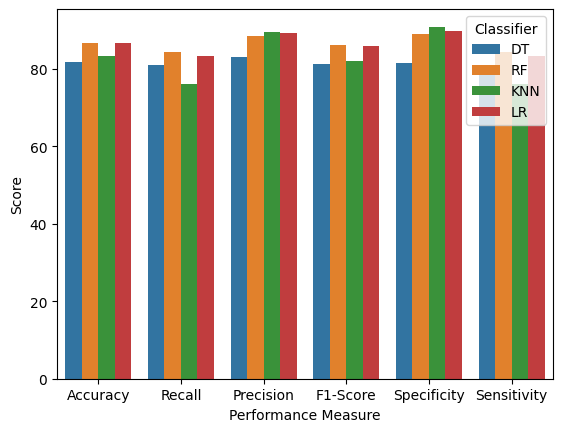

In [171]:
sns.barplot(x = 'Performance Measure', y = 'Score',
            hue = 'Classifier',
            data = viz_df,
            estimator = np.median,
            errorbar=('ci', 0))